# CNN-LSTM Deeplearning model for time series forecasting

In [6]:
import sys
sys.path.append('D:/source/repos')
from utilities.std_imports import *
import tensorflow.keras.models as tkm
import tensorflow.keras.layers as tkl
import tensorflow.keras.utils as tku

### Create data

In [37]:
x = np.array([[10, 20, 30, 40], [20, 30, 40, 50], [30, 40, 50, 60], [40, 50, 60, 70]])
y = np.array([50, 60, 70, 80])
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
x = x.reshape((x.shape[0], 2, 2, 1))

### Build model

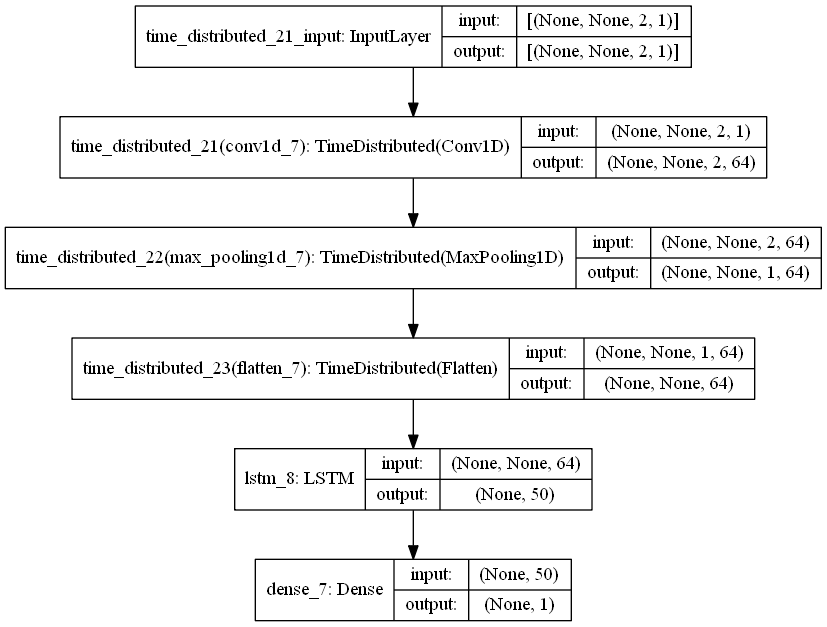

In [38]:
model = tkm.Sequential()
model.add(tkl.TimeDistributed(tkl.Conv1D(filters=64, kernel_size=1, activation='relu'), input_shape=(None, 2, 1)))
model.add(tkl.TimeDistributed(tkl.MaxPooling1D(pool_size=2)))
model.add(tkl.TimeDistributed(tkl.Flatten()))
model.add(tkl.LSTM(units=50, activation='relu'))
model.add(tkl.Dense(units=1))
model.compile(optimizer='adam', loss='mse')
tku.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

### Train

In [39]:
model.fit(x, y, epochs=500, verbose=0)

### Predict

In [41]:
x = np.array([50, 60, 70, 80])
x = x.reshape(1, 2, 2, 1)
pred = model.predict(x, verbose=0)
print('Forecast : ', round(pred[0][0],2))

Forecast :  90.45


### Credits & Links

https://machinelearningmastery.com/cnn-long-short-term-memory-networks/  
https://www.sciencedirect.com/science/article/pii/S2352914820305621  
https://www.hindawi.com/journals/complexity/2020/6622927/  
https://link.springer.com/article/10.1007/s00521-020-04867-x